# `Project`

The `Project` class lets us handle groups of wells. It is really just a list of `Well` objects.

In [19]:
import welly

welly.__version__

'0.5.2'

---

## Make a project

In [20]:
from welly import Project

In [21]:
!ls data/*.LAS

'ls' is not recognized as an internal or external command,
operable program or batch file.


You can pass in a list of files:

In [22]:
p = Project.from_las(['data/P-129_out.LAS', 'data/P-130_out.LAS'])

0it [00:00, ?it/s]Only engine='normal' can read wrapped files
2it [00:01,  1.24it/s]


Or a POSIX-style path:

In [23]:
p = Project.from_las("data/P-*_out.LAS")

0it [00:00, ?it/s]Only engine='normal' can read wrapped files
2it [00:01,  1.45it/s]Only engine='normal' can read wrapped files
3it [00:02,  1.44it/s]


In [24]:
len(p)

3

Typical, the UWIs are a disaster. Let's ignore this for now.

The `Project` is really just a list-like thing:

In [25]:
for w in p:
    print(w.uwi)

Long = 63* 45'24.460  W
100/N14A/11E05
-999.25


In [26]:
for w in p:
   print(w)

Well(uwi: 'Long = 63* 45'24.460  W', name: 'Kennetcook #2', 24 curves: ['CALI', 'HCAL', 'PEF', 'DT', 'DTS', 'DPHI_SAN', 'DPHI_LIM', 'DPHI_DOL', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'RLA5', 'RLA3', 'RLA4', 'RLA1', 'RLA2', 'RXOZ', 'RXO_HRLT', 'RT_HRLT', 'RM_HRLT', 'DRHO', 'RHOB', 'GR', 'SP'])
Well(uwi: '100/N14A/11E05', name: 'ELMWORTH 100/N-14-A/11-E-O5', 18 curves: ['CALI', 'DT', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'DPHI_LIM', 'DPHI_SAN', 'DPHI_DOL', 'M2R9', 'M2R6', 'M2R3', 'M2R2', 'M2R1', 'GR', 'SP', 'PEF', 'DRHO', 'RHOB'])
Well(uwi: '-999.25', name: 'Eastrock Lauren #1', 22 curves: ['CALI', 'DT', 'DTS', 'DPHI_SAN', 'DPHI_LIM', 'DPHI_DOL', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'AMF', 'AF90', 'AF10', 'AF20', 'AF60', 'AF30', 'RXOZ', 'GR', 'POTA', 'THOR', 'URAN', 'SP', 'RHOB'])


Some of the UWIs are pretty messed up.

## Plot curves from several wells

In [27]:
import matplotlib.pyplot as plt

In [28]:
alias = {'Gamma': ['GR', 'GRC', 'NGT'], 'Caliper': ['HCAL', 'CALI']}

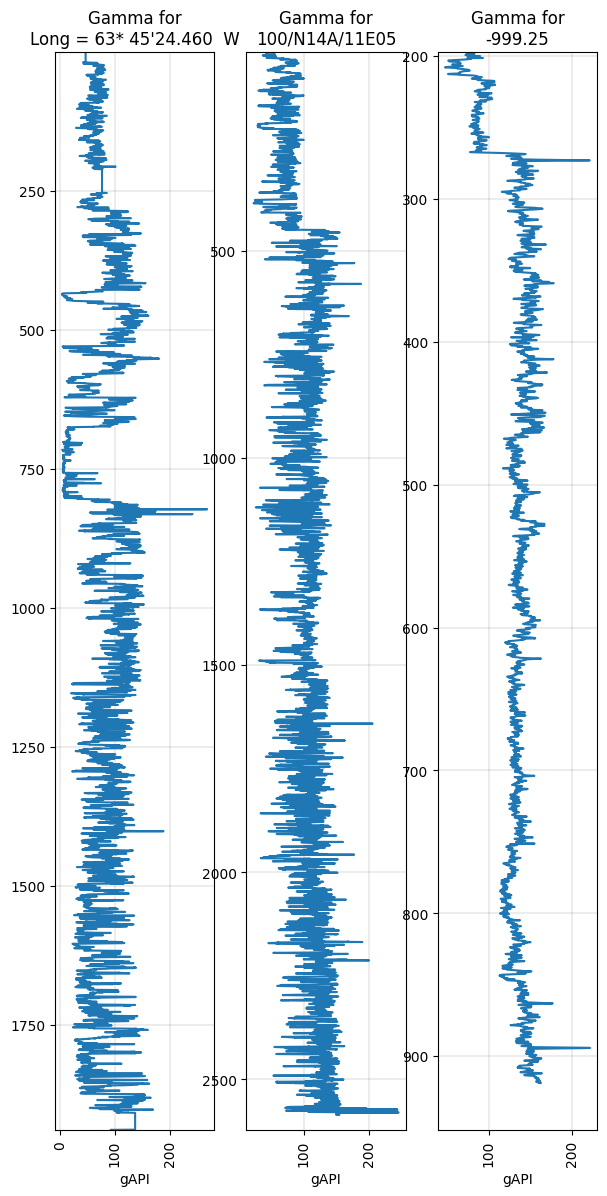

In [29]:
fig, axs = plt.subplots(figsize=(7, 14), ncols=len(p))

for i, (ax, w) in enumerate(zip(axs, p)):
    gr = w.get_curve('Gamma', alias=alias)
    if gr is not None:
        ax = gr.plot(ax=ax)
    ax.set_title("Gamma for\n{}".format(w.uwi))
    
plt.show()

## Export data to pandas DataFrame

This makes a DataFrame using a dual index of UWI and Depth.

In [30]:
keys = ['Caliper', 'Gamma', 'DT']

df = p.df(keys=keys, alias=alias)
df

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


Caliper        Gamma  DT
UWI                     DEPT                                   
Long = 63* 45'24.460  W 1.0668    4.3912849426  46.69865036 NaN
                        1.2192    4.3912849426  46.69865036 NaN
                        1.3716    4.3912849426  46.69865036 NaN
                        1.5240    4.3912849426  46.69865036 NaN
                        1.6764    4.3912849426  46.69865036 NaN
...                                        ...          ...  ..
-999.25                 951.2808           NaN          NaN NaN
                        951.4332           NaN          NaN NaN
                        951.5856           NaN          NaN NaN
                        951.7380           NaN          NaN NaN
                        951.8904           NaN          NaN NaN

[43702 rows x 3 columns]

In [31]:
df.describe()

,Caliper,Gamma,DT
count,32453.0000000000,43065.0000000000,40837.0000000000
mean,8.2408052234,99.6887293919,70.5043469895
std,1.5750388977,33.6619088185,11.0577036481
min,3.0099213123,3.8940699100,40.5831336980
25%,7.9431891440,76.3779983522,63.4587516781
50%,8.6464567184,106.2610015910,68.1679153468
75%,8.9004726414,125.8040008512,74.4538040147
max,15.5796451570,267.9404296900,134.0126342799


<Axes: xlabel='DEPT'>

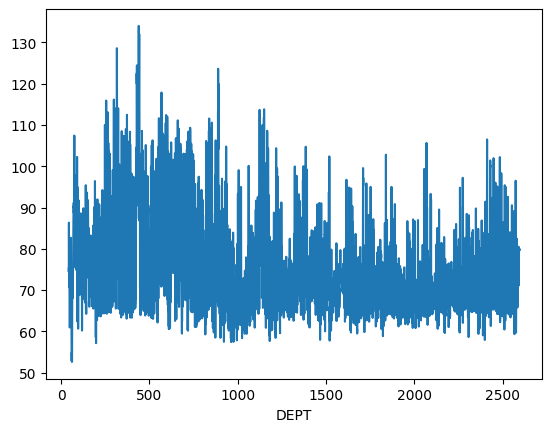

In [32]:
df.loc['100/N14A/11E05'].DT.plot()

In [33]:
x = df.loc['100/N14A/11E05'].index
idx = df.loc['100/N14A/11E05'].loc[(28<x) & (x<30)].index
idx

Index([28.099999999999547,  28.19999999999954, 28.299999999999535,
        28.39999999999953, 28.499999999999524,  28.59999999999952,
       28.699999999999513, 28.799999999999507,   28.8999999999995,
       28.999999999999496,  29.09999999999949, 29.199999999999484,
        29.29999999999948, 29.399999999999473, 29.499999999999467,
        29.59999999999946, 29.699999999999456,  29.79999999999945,
       29.899999999999444,  29.99999999999944],
      dtype='float64', name='DEPT')

## Quality

We can make some tests of curve quality.

In [34]:
import welly.quality as q

In [35]:
tests = {
#    'Each': [q.no_gaps],
    'Gamma': [q.no_monotonic, q.no_flat, q.all_positive],
    'DT': [q.all_positive, q.all_between(50, 200)],
}

In [36]:
from IPython.display import HTML

In [37]:
HTML(p.curve_table_html(keys=['CALI', 'Gamma', 'DT', 'SP'], tests=tests, alias=alias))

Idx,UWI,Data,Passing,CALI,Gamma*,DT,SP
,,,%,3/3 wells,3/3 wells,3/3 wells,3/3 wells
0,Long = 63* 45'24.460 W,4/24 curves,40,CALI⬤7.97 in,GR⬤78.99 gAPI,DT⬤63.08 us/ft,SP⬤52.47 mV
1,100/N14A/11E05,4/18 curves,100,CALI⬤8.90 in,GR⬤103.74 gAPI,DT⬤74.90 us/ft,SP⬤101.60 mV
2,-999.25,4/22 curves,100,CALI⬤6.42 in,GR⬤133.38 gAPI,DT⬤63.38 us/ft,SP⬤-416.47 mV


---

&copy; 2022 Agile Scientific, CC BY